### Descrizione del problema
Il problema riguarda la previsione degli stipendi dei programmatori specializzati in intelligenza artificiale nel mercato mondiale. Si dispone di un dataset contenente informazioni su 15.000 offerte di lavoro reali su più di 20 paesi, con variabili che descrivono aspetti professionali, demografici e geografici. L'obiettivo principale è sviluppare un modello di machine learning in grado di stimare con precisione il livello salariale in base a queste caratteristiche.  

### Importazione delle librerie necessarie

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path as path

### Lettura del file

In [32]:
file = '../dataset/ai_job_dataset.csv'

if path.exists(file):
    dataSet = pd.read_csv(file, index_col=0)

dataSet.head()

,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
job_id,,,,,,,,,,,,,,,,,,
AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [13]:
dataSet.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, AI00001 to AI15000
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               15000 non-null  object 
 1   salary_usd              15000 non-null  int64  
 2   salary_currency         15000 non-null  object 
 3   experience_level        15000 non-null  object 
 4   employment_type         15000 non-null  object 
 5   company_location        15000 non-null  object 
 6   company_size            15000 non-null  object 
 7   employee_residence      15000 non-null  object 
 8   remote_ratio            15000 non-null  int64  
 9   required_skills         15000 non-null  object 
 10  education_required      15000 non-null  object 
 11  years_experience        15000 non-null  int64  
 12  industry                15000 non-null  object 
 13  posting_date            15000 non-null  object 
 14  application_deadline    15000 non-n

### Significato delle colonne

- **job_id** -> Identificatore univoco per ciascuna offerta di lavoro
- **job_title** -> Nome del lavoro(standardizzato)
- **salary_usd** -> Salario annuale in dollari americani
- **salary_currency** -> Valuta originale dell'offerta
- **experience_level** -> EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- **employment_type** -> FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)	
- **company_location** -> Paese in cui si trova la azienda.
- **company_size** -> S (Piccola <50), M (Media 50-250), L (Grande >250)
- **employee_residence** -> Paese in cui vive il lavoratore
- **remote_ratio** -> 0 (No remote), 50 (Hybrid), 100 (Fully remote)
- **required_skills** -> Top 5 skill richieste (divise da virgola)
- **education_required** -> Educazione minima richiesta (Bachelor, Master, PhD, Associate)	
- **years_experience** -> Anni di esperienza richiesta
- **industry** -> Settore industriale della azienda
- **posting_date** -> Data in cui è stato pubblicata l'offerta di lavoro
- **application_deadline** -> Data di terminazione ricezione delle candidature
- **job_description_length** -> Numero di caratteri della descrizione dell'offerta
- **benefits_score** -> Punteggio numerico che valorizza il pacchetto di benefit aziendali (da 1 a 10) 
- **company_name** -> Il nome ("generici e tematici") delle aziende (es. TechCorp Inc, Smart Analytics)

### Analisi dati

Questi dati rappresentano un sommario statistico ottenuto tramite il metodo describe() di pandas su un dataset composto da 15.000 offerte di lavoro nel settore dell'intelligenza artificiale. 

La retribuzione media è di circa 115.349 USD, con una deviazione standard significativa di oltre 60.260 USD, a indicare una forte variabilità tra i ruoli.

Gli stipendi variano da un minimo di 32.519 USD a un massimo di 399.095 USD.

Il 25% più basso guadagna meno di 70.180 USD, mentre il 25% più alto guadagna più di 146.409 USD.

La media è circa 49.48, suggerendo una distribuzione abbastanza bilanciata tra lavoro in sede e remoto.

I quartili mostrano che il 25% delle posizioni è completamente in sede (0), il 50% è almeno parzialmente remoto (valore mediano di 50), e il 25% è completamente remoto (100).

L’esperienza media richiesta è di circa 6.25 anni, con un intervallo che va da 0 a 19 anni.

Il 50% delle offerte richiede 5 anni o meno, mentre solo il 25% superiore richiede più di 10 anni.

Le descrizioni sono mediamente lunghe, con una media di 1.503 caratteri, e variano tra 500 e 2.499 caratteri.

Il valore mediano è 1.512, e la distribuzione è relativamente simmetrica.

Il punteggio medio è 7.50, suggerendo benefit generalmente buoni.

I punteggi vanno da 5 a 10, con il 25% delle offerte che offrono benefit sotto 6.2, e il 25% superiore sopra 8.8.

In [12]:
dataSet.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


Ricerchiamo l'eventuale presenza di valori nulli all'interno del dataset

In [14]:
dataSet.isna().sum()

job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

Abbiamo verificato che non sono presenti valori nulli nel dataset.
Procediamo quindi con l’analisi delle feature, al fine di individuare ed eventualmente rimuovere quelle superflue per la nostra analisi.

Una prima colonna che possiamo eliminare è **salary_currency**, poiché disponiamo già della conversione degli stipendi in dollari americani. Inoltre, per analizzare dove i lavori risultano meglio retribuiti, è più utile fare riferimento direttamente alla variabile **company_location**.

Anche la variabile **job_description_length** può essere rimossa, in quanto la sola lunghezza della descrizione dell’offerta di lavoro non fornisce informazioni significative ai fini dell’analisi salariale.

Tra le due variabili temporali presenti, scegliamo di mantenere solo **posting_date**, poiché risulta più utile per cogliere eventuali effetti stagionali o temporali sul salario. La variabile **application_deadline**, invece, viene esclusa in quanto meno informativa e meno direttamente correlata al contesto economico dell’offerta.

Infine, rimuoviamo anche la variabile **company_name**, in quanto non rappresenta i veri nomi delle aziende. Si tratta piuttosto di etichette generiche o tematiche (es. AI Innovations, Cloud Solutions) che ho visto essere solo 16 ripetute e aventi circa lo stesso numero di offerte ciascuna, che riflettono il settore di appartenenza già descritto dalla variabile **industry**, rendendola ridondante per i nostri scopi.

### Preparazione dei dati

In [33]:
columns_to_drop = [
    'salary_currency',
    'job_description_length',
    'application_deadline',
    'company_name'
]

dataSet.drop(columns=columns_to_drop, inplace=True)

dataSet.head(100)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,benefits_score
job_id,,,,,,,,,,,,,,
AI00001,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,5.9
AI00002,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,5.2
AI00003,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,9.4
AI00004,NLP Engineer,80215,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,8.6
AI00005,AI Consultant,54624,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AI00096,NLP Engineer,98688,SE,FT,Israel,M,Israel,50,"Statistics, Python, TensorFlow, PyTorch, Git",Bachelor,8,Manufacturing,2024-04-10,8.6
AI00097,Data Analyst,109029,SE,FT,France,S,France,0,"Kubernetes, Scala, Java",Bachelor,6,Technology,2025-04-05,6.1
AI00098,NLP Engineer,84797,MI,FT,Canada,M,Canada,0,"Deep Learning, Statistics, Computer Vision, Te...",Master,4,Real Estate,2024-12-04,6.2


### Analisi del dominio dei dati in nostro possesso

In [55]:
for x in ["job_title", "company_location", "industry", "employee_residence", "years_experience"]:
    print(x + ":\t" + str(data[x].nunique()))
    
diff_location = data[data['employee_residence'] != data['company_location']]

print(f"Numero di offerte in cui employee_residence ≠ company_location: {len(diff_location)}")


job_title:	20
company_location:	20
industry:	15
employee_residence:	20
years_experience:	20
Numero di offerte in cui employee_residence ≠ company_location: 4256


Sono presenti "solo" 20 **job_title**

Stessa cosa per **company_location** e **employee_residence** che hanno lo stesso numero di istanze

Visto che molte offerte hanno la residenza del lavoratore differente da quella della company ha senso effettuare uno studio su cosa comporta questa situazione quindi non rimuovo nessuna delle due variabili

Verifico ora i paesi da cui la maggior parte delle offerte provengono

In [50]:
def plot_bar(feature, n, title):
    data[feature].value_counts()[:n].plot.bar(figsize=(15, 4))
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel("Frequenza")
    plt.show()

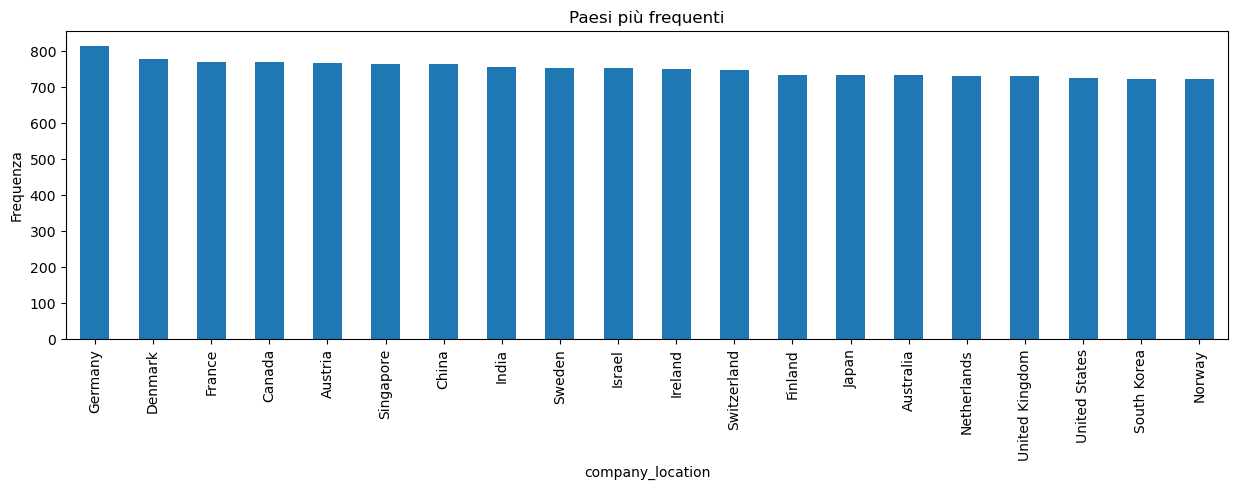

In [47]:
plot_bar("company_location", 20, "Paesi più frequenti")

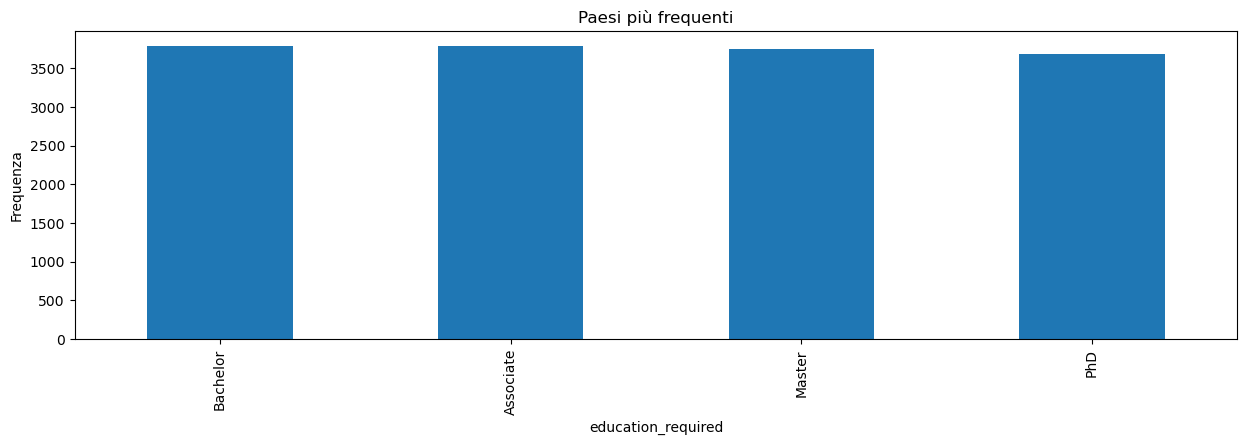

In [57]:
plot_bar("education_required", 20, "Paesi più frequenti")

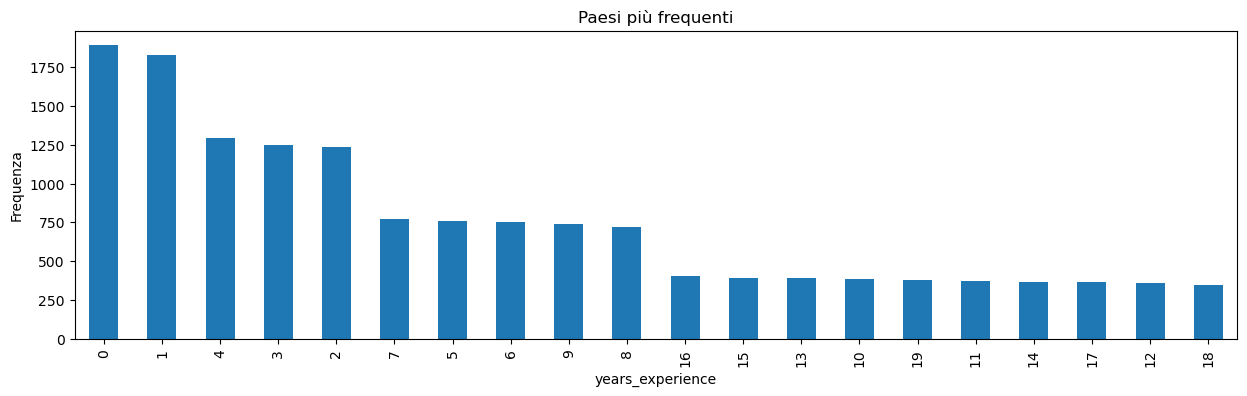

In [56]:
plot_bar("years_experience", 20, "Paesi più frequenti")

Notiamo che variabili come company_location e altre (come industry, job_title, ecc.) mostrano una distribuzione fortemente sbilanciata, con frequenze molto simili tra le classi o pochi valori dominanti. Questo aspetto va tenuto in considerazione in fase di selezione delle feature, poiché può impattare negativamente sull'efficacia del processo di regressione.